## Dataset generation from deformable mirror

A Parabolic GRIN fiber or a Step-Index fiber can be used

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from mmfsim.grid import Grid
from mmfsim.fiber import GrinFiber, StepIndexFiber
from mmfsim.datasets import SimulatedGrinSpeckleOutputDataset, SimulatedStepIndexSpeckleOutputDataset, SimulatedSpeckleOutputDataset

### Setup

Set the computation grid and the fiber characteristics

In [5]:
fiber_type: str = 'step' # 'grin' or 'step'
grid_settings: dict = {'pixel_size': 1e-6, 'pixel_numbers': (64, 64)}
fiber_settings: dict = {'radius': 25e-6, 'wavelength': 1064e-9, 'n1': 1.465, 'n2': 1.44839}
dataset_settings: dict = {'length': 200, 'degen': True, 'phases_dim': (8,8)}
fourier_settings: dict = {'pad': 1}
export_settings: dict = {'return_output_fields': False, 'add_exp_noise': False, 'noise_func': np.max, 'file_type': 'matlab'}

### Dataset generation

Generate the grid and the fiber

In [6]:
grid = Grid(**grid_settings)

if fiber_type.lower() in ['grin']:
    fiber = GrinFiber(**fiber_settings)
elif fiber_type.lower() in ['step', 'si']:
    fiber = StepIndexFiber(**fiber_settings)
else:
    raise ValueError(f"Unknown fiber type.")
print(fiber)

StepIndexFiber instance with:
  - Radius: 25.0 um
  - Core index: 1.465
  - Cladding index: 1.44839
  - Wavelength: 1064.0 nm
  - Numerical aperture: 0.220
  - Number of guided LP modes: 140
  - Number of guided LP modes (counting degenerates): 269
  - First 10 LP_n,m modes characteristics:
  n_eff      h          n          m
[[ 1.46491477  0.          0.          1.        ]
 [ 1.46478363  2.          1.          1.        ]
 [ 1.46461132  4.          2.          1.        ]
 [ 1.46455097  1.          0.          2.        ]
 [ 1.46440012  6.          3.          1.        ]
 [ 1.46427477  3.          1.          2.        ]
 [ 1.46415143  8.          4.          1.        ]
 [ 1.46395609  5.          2.          2.        ]
 [ 1.46389667  2.          0.          3.        ]
 [ 1.46386618 10.          5.          1.        ]]


Compute and store the modes for a much faster dataset generation, plot one for checking extent

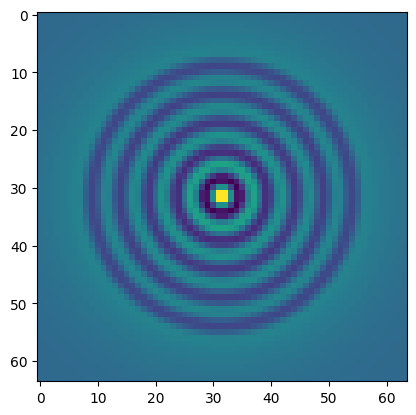

In [7]:
fiber.compute_modes_fields(grid)
plt.imshow(fiber._modes[:,:,1,-1])

Compute dataset

In [8]:
dset = SimulatedStepIndexSpeckleOutputDataset(fiber, grid, N_modes=fiber._N_modes_degen, length=dataset_settings['length'])
dset.compute_from_transfer_matrix(phases_dim=dataset_settings['phases_dim'])
# dset.compute_fourier_transforms(**fourier_settings)

Found 4 input variable weights below threshold 0.001 to delete.
Successfully deleted low weight input variables.
Computed TM row 1/60
Computed TM row 2/60
Computed TM row 3/60
Computed TM row 4/60
Computed TM row 5/60
Computed TM row 6/60
Computed TM row 7/60
Computed TM row 8/60
Computed TM row 9/60
Computed TM row 10/60
Computed TM row 11/60
Computed TM row 12/60
Computed TM row 13/60
Computed TM row 14/60
Computed TM row 15/60
Computed TM row 16/60
Computed TM row 17/60
Computed TM row 18/60
Computed TM row 19/60
Computed TM row 20/60
Computed TM row 21/60
Computed TM row 22/60
Computed TM row 23/60
Computed TM row 24/60
Computed TM row 25/60
Computed TM row 26/60
Computed TM row 27/60
Computed TM row 28/60
Computed TM row 29/60
Computed TM row 30/60
Computed TM row 31/60
Computed TM row 32/60
Computed TM row 33/60
Computed TM row 34/60
Computed TM row 35/60
Computed TM row 36/60
Computed TM row 37/60
Computed TM row 38/60
Computed TM row 39/60
Computed TM row 40/60
Computed TM row 

In [11]:
from copy import deepcopy

dsets = []
stds = sorted([7e-2, 5e-2, 4e-2, 3e-2, 2e-2, 1e-2, 5e-3, 0])

for std in stds:

    _dset = deepcopy(dset)
    _dset._coupling_matrix = (
        (np.real(dset._coupling_matrix) + std * np.random.randn(*dset._coupling_matrix.shape))
        + 1j * (np.imag(dset._coupling_matrix) + std * np.random.randn(*dset._coupling_matrix.shape))
    )

In [12]:
from copy import deepcopy

dsets = []
stds = sorted([7e-2, 5e-2, 4e-2, 3e-2, 2e-2, 1e-2, 5e-3, 0])

for std in stds:

    _dset = deepcopy(dset)
    _dset._coupling_matrix = (
        (np.real(dset._coupling_matrix) + std * np.random.randn(*dset._coupling_matrix.shape))
        + 1j * (np.imag(dset._coupling_matrix) + std * np.random.randn(*dset._coupling_matrix.shape))
    )

    _dset.compute_from_transfer_matrix(phases_dim=dataset_settings['phases_dim'])
    dsets.append(_dset)
    # _dset.compute_fourier_transforms(**fourier_settings)

Found 4 input variable weights below threshold 0.001 to delete.
Successfully deleted low weight input variables.
Computed TM row 1/60
Computed TM row 2/60
Computed TM row 3/60
Computed TM row 4/60
Computed TM row 5/60
Computed TM row 6/60
Computed TM row 7/60
Computed TM row 8/60
Computed TM row 9/60
Computed TM row 10/60
Computed TM row 11/60
Computed TM row 12/60
Computed TM row 13/60
Computed TM row 14/60
Computed TM row 15/60
Computed TM row 16/60
Computed TM row 17/60
Computed TM row 18/60
Computed TM row 19/60
Computed TM row 20/60
Computed TM row 21/60
Computed TM row 22/60
Computed TM row 23/60
Computed TM row 24/60
Computed TM row 25/60
Computed TM row 26/60
Computed TM row 27/60
Computed TM row 28/60
Computed TM row 29/60
Computed TM row 30/60
Computed TM row 31/60
Computed TM row 32/60
Computed TM row 33/60
Computed TM row 34/60
Computed TM row 35/60
Computed TM row 36/60
Computed TM row 37/60
Computed TM row 38/60
Computed TM row 39/60
Computed TM row 40/60
Computed TM row 

(4096, 60)


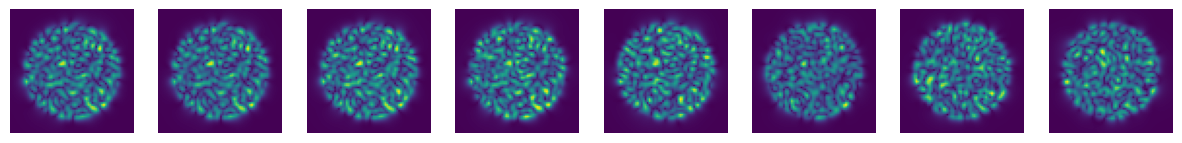

In [13]:
print(dset.reshaped_transfer_matrix.shape)

x = np.random.rand(dset.reshaped_transfer_matrix.shape[1]) * np.exp(1j * 2 * np.pi * np.random.rand(dset.reshaped_transfer_matrix.shape[1]))
y = []

plt.figure(figsize=(15, 5))
for i in range(len(dsets)):
    y = dsets[i].reshaped_transfer_matrix @ x
    y = np.reshape(y, [64, 64])

    plt.subplot(1, len(dsets), i + 1)
    plt.imshow(np.abs(y.reshape([64, 64])))
    # plt.colorbar(location='bottom')
    plt.axis('off')



### Dataset checking and export

Display a random draw from the dataset as a check

Export it if it looks ok

In [26]:
for i in range(len(dsets)):
    name = f"tm_{dsets[i]._phase_dims[0]:d}x{dsets[i]._phase_dims[1]:d}_s={stds[i]:1.1e}"
    dsets[i].export(name=name, **export_settings)

Dataset saved: .\tm_16x16_s=0.0e+00.mat
Dataset saved: .\tm_16x16_s=5.0e-03.mat
Dataset saved: .\tm_16x16_s=1.0e-02.mat
Dataset saved: .\tm_16x16_s=2.0e-02.mat
Dataset saved: .\tm_16x16_s=3.0e-02.mat
Dataset saved: .\tm_16x16_s=4.0e-02.mat
Dataset saved: .\tm_16x16_s=5.0e-02.mat
Dataset saved: .\tm_16x16_s=7.0e-02.mat


In [14]:
print(f"tm_{dsets[i]._phase_dims[0]:d}x{dsets[i]._phase_dims[1]:d}_s={stds[i]:1.1e}")

tm_8x8_s=7.0e-02


In [21]:
dset._phase_dims

(16, 16)